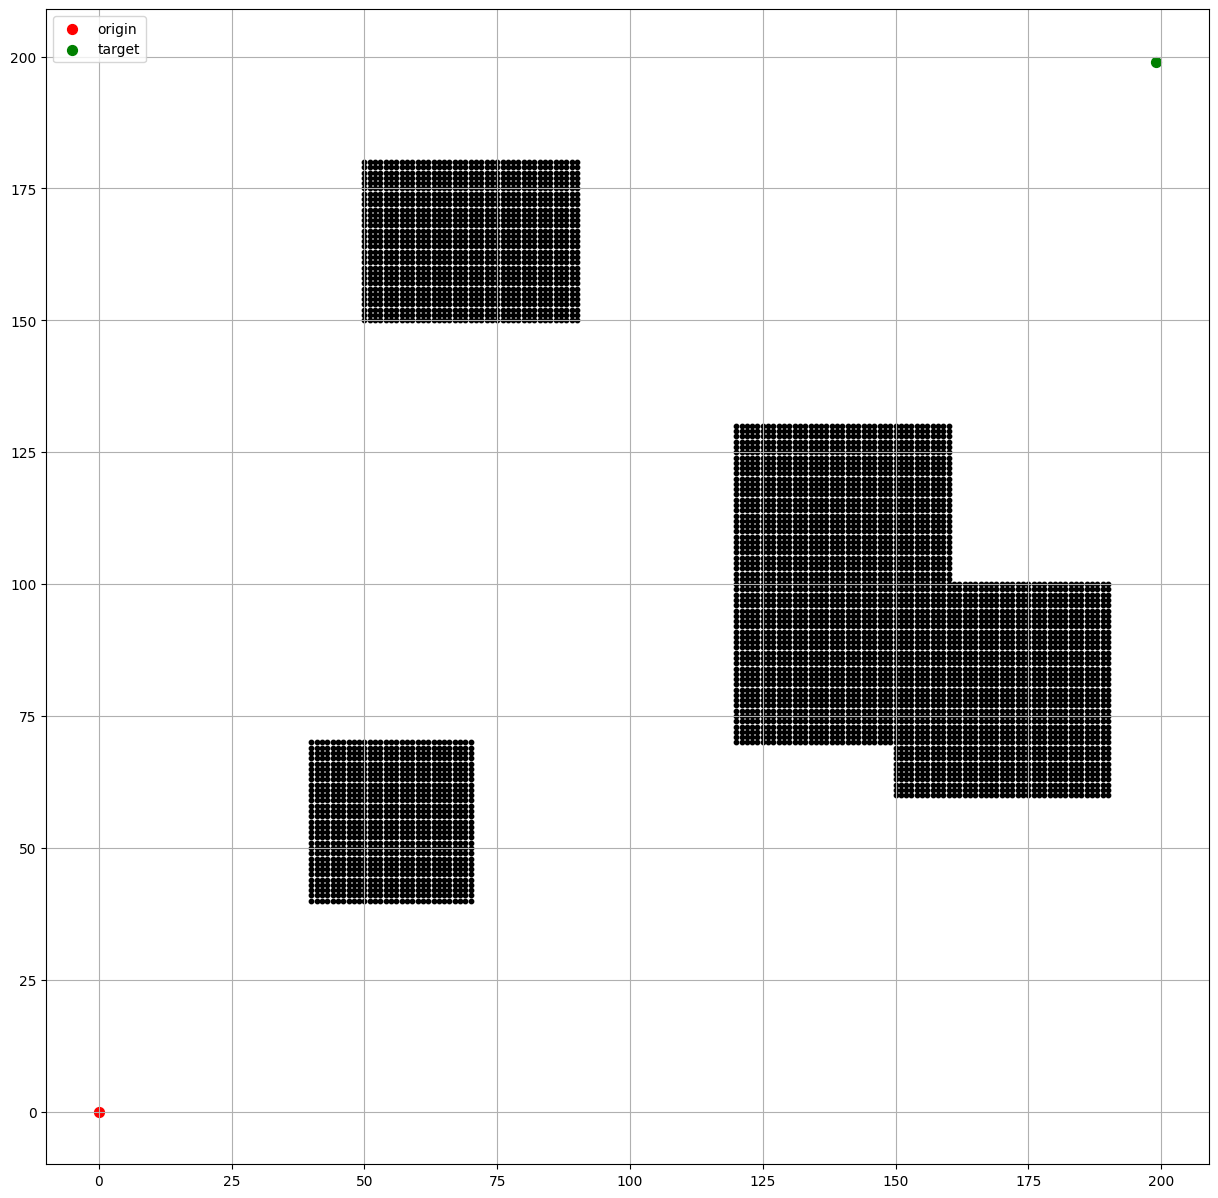

In [6]:
#1
import numpy as np
import matplotlib.pyplot as plt
grid =np.full((200,200),np.inf,dtype=np.float16)

grid[40:71,40:71]= -np.inf
grid[70:131,120:161]= -np.inf
grid[150:181,50:91]= -np.inf
grid[60:101,150:191]= -np.inf
origin=(0,0)
target=(199,199)
visgrid= np.zeros_like(grid)
visgrid[grid==-np.inf]=1
(obstacle_y,obstacle_x)=np.where(visgrid==1)
plt.figure(figsize=(15,15))
plt.grid(True)

plt.scatter(obstacle_x, obstacle_y, c='black', s=10)
plt.scatter(origin[1],origin[0], c='red', s=50, label='origin')
plt.scatter(target[1],target[0], c='green', s=50, label='target')
plt.legend()
plt.show()

In [ ]:
#2
import heapq
dir = [(-1,0),(1,0),(0,-1),(0,1), (-1,-1), (-1,1), (1,-1), (1,1)]
dists = [1,1,1,1, np.sqrt(2), np.sqrt(2), np.sqrt(2), np.sqrt(2)]
parent = np.empty((200,200), dtype=object)
for i in range(200):
    for j in range(200):
        parent[i,j] = (i,j)
def dijkstra(grid, origin, target):
    visited = np.full(grid.shape, False)
    pq = []
    heapq.heappush(pq, (0, origin))
    while pq:
        dist, (i,j) = heapq.heappop(pq)

        if visited[i,j]:
            continue
        visited[i,j] = True

        if (i,j) == target:
            break

        for (di,dj), d in zip(dir, dists):
            ni, nj = i+di, j+dj
            if 0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]:
                if grid[ni,nj] != -np.inf and not visited[ni,nj]:
                    new_dist = dist + d
                    if new_dist < grid[ni,nj]:
                        grid[ni,nj] = new_dist
                        parent[ni,nj] = (i,j)
                        heapq.heappush(pq, (new_dist, (ni,nj)))
                        return grid, parent

grid_copy = np.copy(grid)
grid_copy, parent = dijkstra(grid_copy, origin, target)
path = []
cell = target
while cell != origin:
    path.append(cell)
    cell = parent[cell]
path.append(origin)
path.reverse()
visgrid = np.zeros_like(grid_copy)
visgrid[grid_copy == -np.inf] = 1
obstacle_y, obstacle_x = np.where(visgrid == 1)
plt.figure(figsize=(15,15))
plt.grid(True)
plt.scatter(obstacle_x, obstacle_y, c='black', s=10)
plt.scatter(origin[1], origin[0], c='red', s=50, label='origin')
plt.scatter(target[1], target[0], c='green', s=50, label='Target')
path_y = [p[0] for p in path]
path_x = [p[1] for p in path]
plt.plot(path_x, path_y, c='blue', linewidth=2, label='Path')
plt.legend()
plt.show()
#not able to compute giving timeout error

